# Simple Data Analysis and Linear Regression Modelling

## The `housing` problem

We want to predict average house values in suburbs of Boston.

Accesible en https://archive.ics.uci.edu/ml/datasets/Housing

### Attribute Information:

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per \$10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in \$1000's

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import time
import pickle
import gzip

import sklearn as skl
import seaborn as sns

from sklearn.datasets import load_boston

## Carga de datos

In [3]:
boston_data = load_boston()

df_housing = pd.DataFrame(data=boston_data['data'], columns=boston_data['feature_names'])
df_housing['MEDV'] = boston_data['target']

print ("nFilas: %d\tnColumnas: %d\n" % (df_housing.shape[0], df_housing.shape[1]) )
print ("Columnas:\t", np.array(df_housing.columns))

nFilas: 506	nColumnas: 14

Columnas:	 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'MEDV']


## Descripción, visualización y correlaciones

### Análisis descriptivo.

In [4]:
df_housing.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Boxplots and histograms

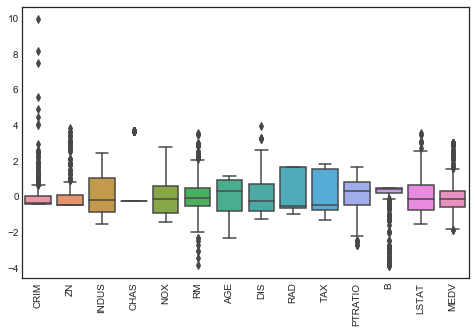

In [5]:
#normalizamos para tener rangos uniformes en histogramas
df_housing_normalizado = (df_housing - df_housing.mean()) / df_housing.std() 

plt.figure( figsize=(8, 5))
sns.set_style("white")
bx_plot = sns.boxplot(data=df_housing_normalizado)
#bx_plot = sns.boxplot(data=df_housing)
plt.xticks(rotation=90)
plt.show()

### Histograms and scatterplots

Plot histograms of groups of 5 variables plus target.

In [6]:
vars_housing   = df_housing.columns[ : -1]
target_housing = df_housing.columns[-1]

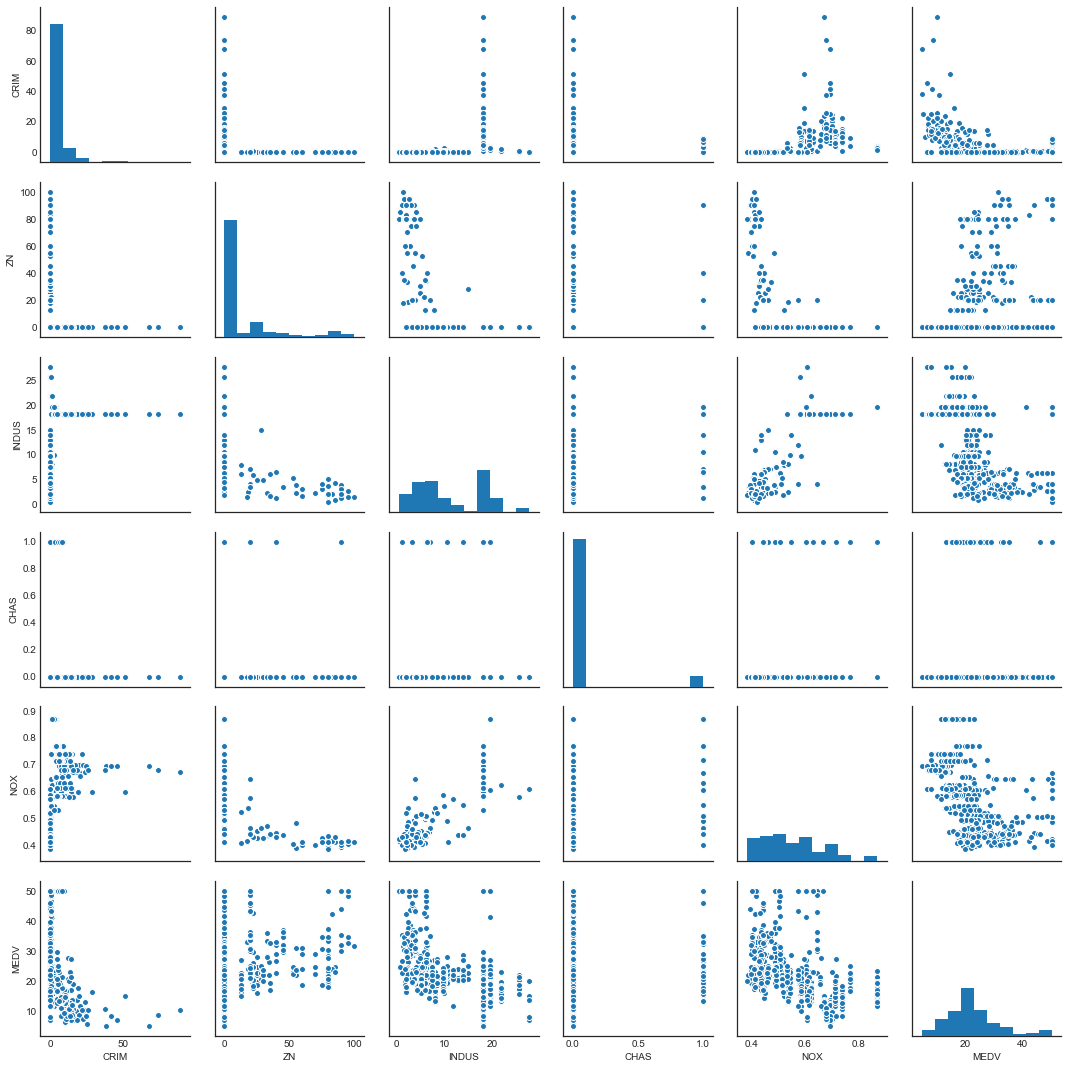

In [7]:
vars_housing   = df_housing.columns[ : -1]
target_housing = df_housing.columns[-1]

pair_plot = sns.pairplot( df_housing[ list(vars_housing[ : 5]) + [target_housing] ] )
plt.show()

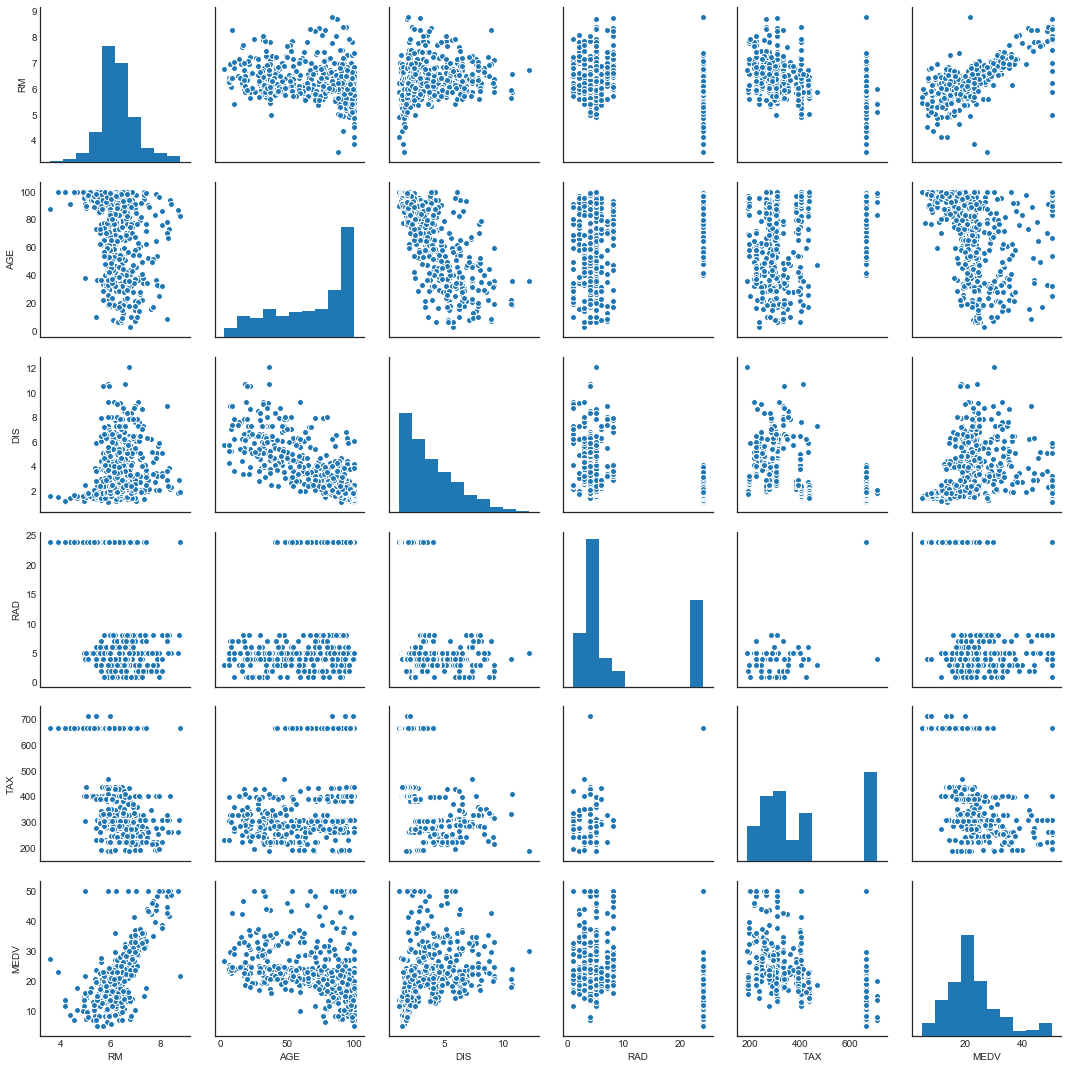

In [8]:
pair_plot = sns.pairplot( df_housing[ list(vars_housing[ 5: 10]) + [target_housing] ] )
plt.show()

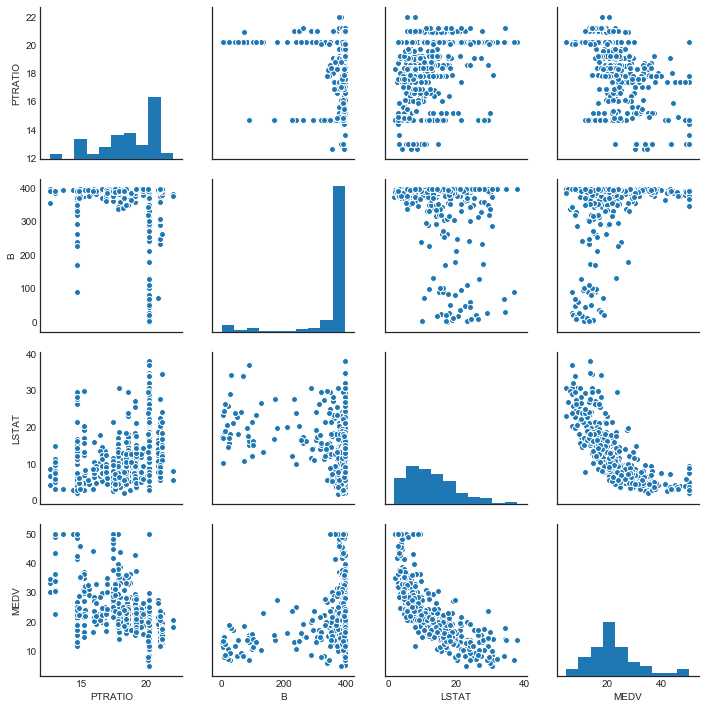

In [9]:
pair_plot = sns.pairplot( df_housing[ list(vars_housing[ 10: ]) + [target_housing] ] )
plt.show()

### Correlations

In [10]:
df_housing.corr().round(decimals=3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.199,0.404,-0.055,0.418,-0.220,0.351,-0.378,0.622,0.580,0.288,-0.377,0.452,-0.386
ZN,-0.199,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.404,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.055,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.418,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.220,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.351,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.378,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.622,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.580,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


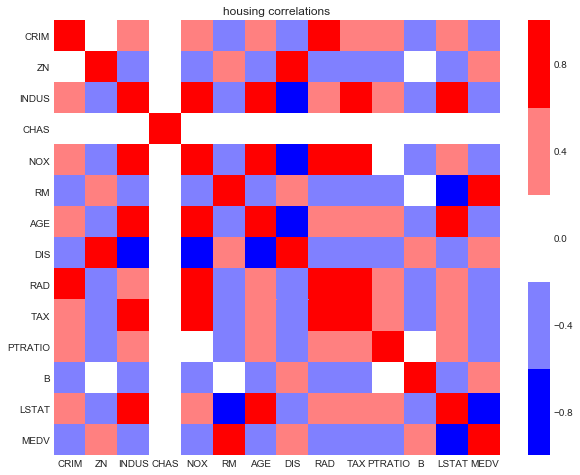

In [11]:
# correlation heatmap
cMap = plt.cm.get_cmap("bwr",lut=5) 

plt.figure( figsize=(10, 8))
plt.title('housing correlations')
_ = sns.heatmap(df_housing.corr().values, vmin=-1., vmax=1., cmap=cMap, 
                xticklabels=list(df_housing.columns),
                yticklabels=list(df_housing.columns))

In [12]:
U, D, V = np.linalg.svd(df_housing.corr().values)
print(D)

[6.54177746 1.64954642 1.34627461 0.88640136 0.85088571 0.6623151
 0.53907544 0.4035401  0.27774988 0.25221834 0.21285329 0.18309915
 0.13392916 0.060334  ]


In [13]:
print( ( df_housing.corr()['MEDV'].abs().sort_values(ascending=False).T) )

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.385832
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64


## Ridge Regression

Just getting started ...

b: 22.532806


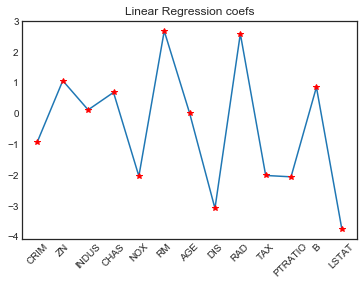

In [14]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

std_sc = StandardScaler()
x = std_sc.fit_transform( df_housing[ vars_housing ].values )
y = df_housing[ target_housing ].values

lr_m =  Ridge()
#ajuste sobre la muestra completa, sin split train-test
lr_m.fit(x, y)

print("b: %f" % lr_m.intercept_)

nticks = len(lr_m.coef_)
plt.xticks(range(len(vars_housing)), vars_housing, rotation=45)
plt.title('Linear Regression coefs')
_ = plt.plot(lr_m.coef_, '-', lr_m.coef_, 'r*')

MAE: 3.269		R^2: 0.741


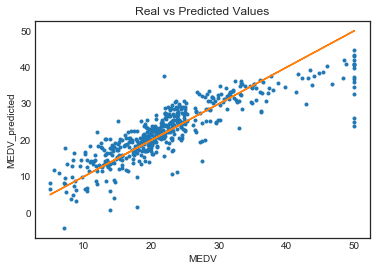

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = lr_m.predict(x)

print("MAE: %.3f\t\tR^2: %.3f" % (mean_absolute_error(y, y_pred), lr_m.score(x, y)))

plt.title('Real vs Predicted Values')
plt.xlabel('MEDV')
plt.ylabel('MEDV_predicted')
_ = plt.plot(y, y_pred, '.', y, y, '-')

We get a more realistic evaluation through Cross Validation.

In [16]:
from sklearn.model_selection import cross_val_score, KFold

n_folds = 10
kf = KFold(shuffle=True)

scores = cross_val_score(lr_m, x, y, scoring="neg_mean_absolute_error", cv=kf)

print("mae_mean: %.3f\t\tmae_std: %.3f" % (-scores.mean(), scores.std()))

mae_mean: 3.435		mae_std: 0.175


In [17]:
print(-scores)

[3.47771458 3.20253527 3.6238139 ]


### Finding the optimal `alpha` by CV

 We select the ridge parameter `alpha` by CV

In [18]:
# select alpha in ridge regression by CV
# First iteration to find alpha
from sklearn.model_selection import GridSearchCV

n_folds = 10

# no shuffle 
kf = KFold(n_folds, shuffle=True)

l_alpha = [2.**k for k in range(-6, 10)]
param_grid = {'alpha': l_alpha}


lr_m = Ridge()
ridge_alpha_search = GridSearchCV(lr_m, param_grid=param_grid, cv=kf, 
                                  scoring='neg_mean_absolute_error',
                                  n_jobs=2, verbose=1)

ridge_alpha_search.fit(x, y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=2)]: Done 160 out of 160 | elapsed:    3.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'alpha': [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=1)

alfa = 32.00
best_cv_mae = 3.355


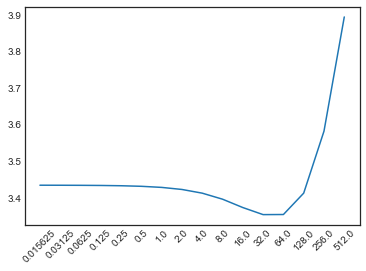

In [19]:
#dir(ridge_alpha_search)

print('alfa = %.2f' % (ridge_alpha_search.best_params_['alpha']))
print('best_cv_mae = %.3f' % (-ridge_alpha_search.best_score_))

plt.xticks(range(len(l_alpha)), l_alpha, rotation=45)
_ = plt.plot( -ridge_alpha_search.cv_results_['mean_test_score'])

In [20]:
#Segunda iteración: recentramos alpha y refinamos la búsqueda
kf = KFold(n_folds, shuffle=True)

l_alpha = [32. * 2.**(k/2.) for k in range(-5, 4)]
param_grid = {'alpha': l_alpha}


lr_m = Ridge()
ridge_alpha_search = GridSearchCV(lr_m, param_grid=param_grid, cv=kf, 
                                  scoring='neg_mean_absolute_error',
                                  n_jobs=2, verbose=1)

ridge_alpha_search .fit(x, y)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'alpha': [5.656854249492381, 8.0, 11.313708498984761, 16.0, 22.627416997969522, 32.0, 45.254833995939045, 64.0, 90.50966799187809]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=1)

alfa = 32.00
best_cv_mae = 3.326


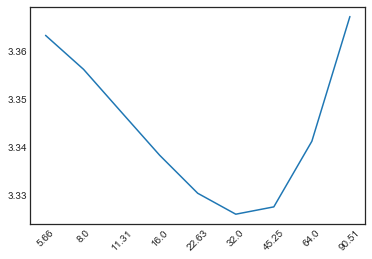

In [21]:
print('alfa = %.2f' % (ridge_alpha_search.best_params_['alpha']))
print('best_cv_mae = %.3f' % (-ridge_alpha_search.best_score_))

plt.xticks(range(len(l_alpha)), np.round(l_alpha, 2), rotation=45)
_ = plt.plot( -ridge_alpha_search.cv_results_['mean_test_score'])

### Testing the final model

We do it by CV.

In [22]:
best_alpha = ridge_alpha_search.best_params_['alpha']
lr_m = Ridge(alpha=best_alpha)

scores = cross_val_score(lr_m, x, y, scoring="neg_mean_absolute_error", cv=kf)

print("mae_mean: %.3f\t\tmae_std: %.3f" % (-scores.mean(), scores.std()))

mae_mean: 3.366		mae_std: 0.371


In [23]:
from sklearn.model_selection import cross_val_predict

y_pred = np.clip( cross_val_predict(lr_m, x, y, cv=kf), 5., 50.)

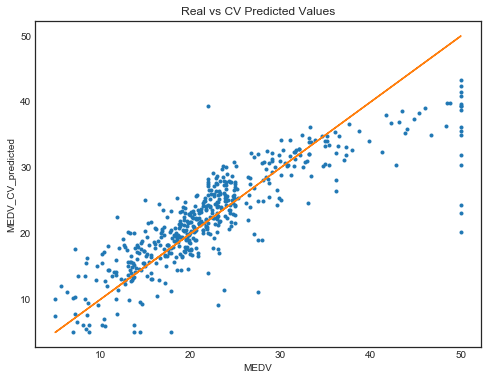

In [24]:
plt.figure( figsize=(8,6))

plt.title('Real vs CV Predicted Values')
plt.xlabel('MEDV')
plt.ylabel('MEDV_CV_predicted')
_ = plt.plot(y, y_pred, '.', y, y, '-')

mae: 3.288


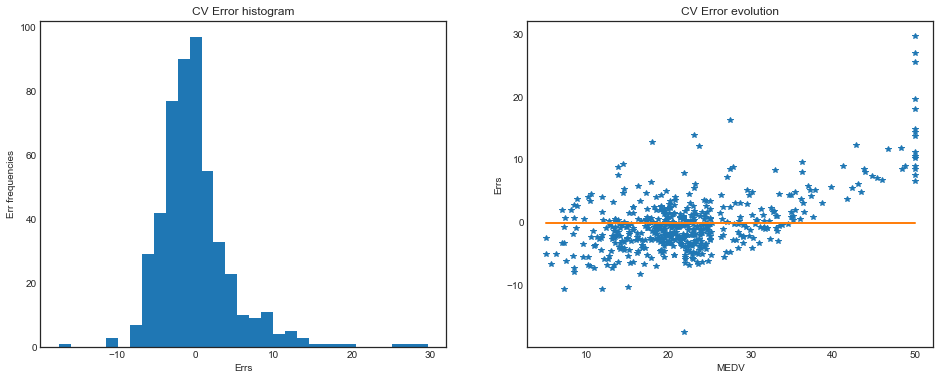

In [25]:
err = y - y_pred

print("mae: %.3f" % (abs(err).mean()) )

plt.figure( figsize=(16,6))

plt.subplot(1,2,1)
plt.title("CV Error histogram")
plt.xlabel("Errs")
plt.ylabel("Err frequencies")
_ = plt.hist(err, bins=31)

plt.subplot(1,2,2)
plt.title("CV Error evolution")
plt.xlabel("MEDV")
plt.ylabel("Errs")
_ = plt.plot(y, err, '*', y, 0.*y, '-')

plt.show()

## Multilayer Perceptons

JUst getting started!

#### Scale the data

In [26]:
from sklearn.neural_network import MLPRegressor

std_sc = StandardScaler()
x = std_sc.fit_transform( df_housing[ vars_housing ] )
y = df_housing[ target_housing ]

####  Define and fit a first MLP

In [27]:
hidden_layer_sizes = (20, 20)
alpha = 1.e-2

#solver: lbfgs para problemas pequeños, adam para problemas grandes
mlp_m =  MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, 
                      activation='relu', 
                      solver='lbfgs', alpha=alpha,
                      early_stopping=True,
                      tol=1.e-8, max_iter=10000)

mlp_m.fit(x, y)

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=1e-08, validation_fraction=0.1,
       verbose=False, warm_start=False)

What do we have in mlp_m?

In [28]:
#dir(mlp_m)

In [29]:
print(mlp_m.coefs_[2].shape)
print(mlp_m.loss_)

(20, 1)
0.04877681041242227


#### Predict and evaluate by CV

MAE: 0.177


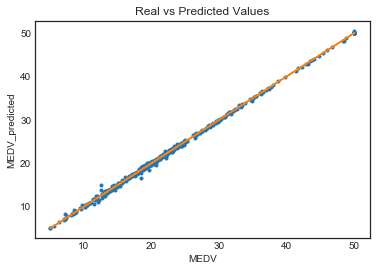

In [30]:
from sklearn.metrics import mean_absolute_error

y_pred = mlp_m.predict(x)

print("MAE: %.3f" % mean_absolute_error(y, y_pred))

plt.title('Real vs Predicted Values')
plt.xlabel('MEDV')
plt.ylabel('MEDV_predicted')
_ = plt.plot(y, y_pred, '.', y, y, '-')

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

n_folds = 5

kf = KFold(n_folds, shuffle=True)

scores_mlp = cross_val_score(mlp_m, x, y, scoring="neg_mean_absolute_error", cv=kf)

In [32]:
print( ("mae_mean: %.3f" % -scores_mlp.mean()),  ("\tmae_std: %.3f" % scores_mlp.std()) )
print(-scores_mlp)

mae_mean: 4.057 	mae_std: 0.296
[4.0179065  3.84927714 4.5415563  4.19244335 3.68293578]


#### Analyze CV predictions

In [33]:
from sklearn.model_selection import cross_val_predict

y_pred_mlp_cv = np.clip( cross_val_predict(mlp_m, x, y, cv=kf), 5., 50.)

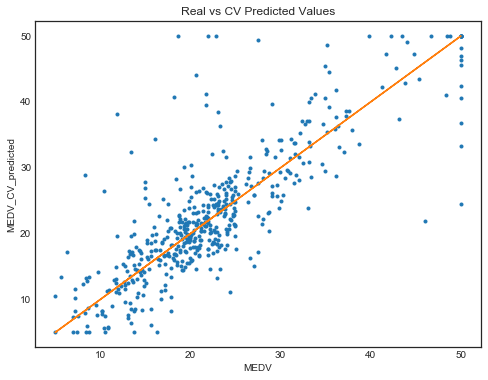

In [34]:
plt.figure( figsize=(8,6))

plt.title('Real vs CV Predicted Values')
plt.xlabel('MEDV')
plt.ylabel('MEDV_CV_predicted')
_ = plt.plot(y, y_pred_mlp_cv, '.', y, y, '-')

mae: 3.783


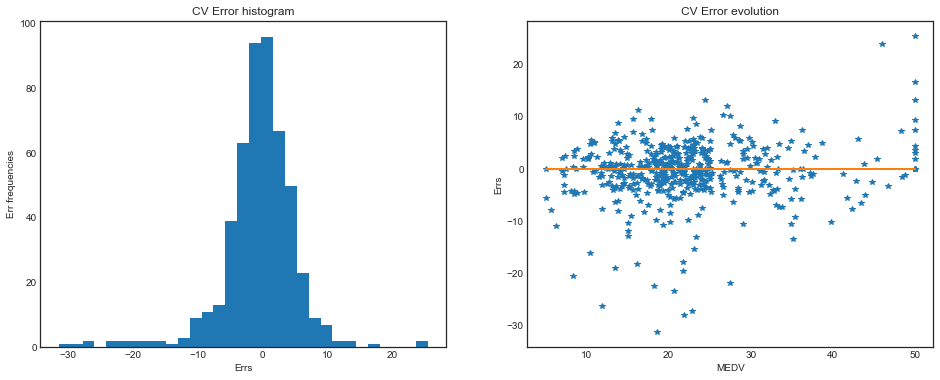

In [35]:
err = y - y_pred_mlp_cv

print("mae: %.3f" % (abs(err).mean()) )

plt.figure( figsize=(16,6))

plt.subplot(1,2,1)
plt.title("CV Error histogram")
plt.xlabel("Errs")
plt.ylabel("Err frequencies")
_ = plt.hist(err, bins=31)

plt.subplot(1,2,2)
plt.title("CV Error evolution")
plt.xlabel("MEDV")
plt.ylabel("Errs")
_ = plt.plot(y, err, '*', y, 0.*y, '-')

plt.show()

### Finding the optimal `alpha` by CV

 We select the l2 penalty parameter `alpha` by CV

In [36]:
# select alpha in mlp regression by CV
# First iteration to find alpha
from sklearn.model_selection import GridSearchCV

n_folds = 5

kf = KFold(n_folds, shuffle=True)

l_alpha = [10.**k for k in range(-6, 7)]
param_grid = {'alpha': l_alpha}


mlp_m =  MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, 
                      activation='relu', 
                      solver='lbfgs', 
                      early_stopping=True,
                      tol=1.e-8, max_iter=10000)

mlp_alpha_search = GridSearchCV(mlp_m, param_grid=param_grid, cv=kf, 
                                scoring='neg_mean_absolute_error',
                                refit=False,
                                n_jobs=2, verbose=1)

t_0 = time.time()
mlp_alpha_search.fit(x, y)
print("\nmlp_grid_search_time:", time.time() - t_0, "\n\n")
        
f = gzip.open('mlp_alpha_search_results.pkz', mode='wb', compresslevel=9)
pickle.dump(mlp_alpha_search, f, protocol=3)
f.close()

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  7.6min



mlp_grid_search_time: 457.7215850353241 




[Parallel(n_jobs=2)]: Done  65 out of  65 | elapsed:  7.6min finished


best_alpha = 10.00
best_cv_mae = 2.113


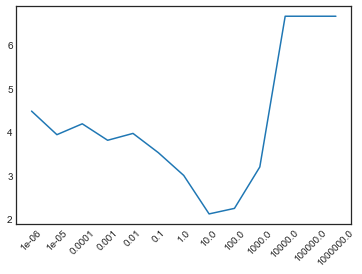

In [37]:
f = gzip.open('mlp_alpha_search_results.pkz', mode='rb')
mlp_alpha_search = pickle.load(f)
f.close()

best_alpha = mlp_alpha_search.best_params_['alpha']

print('best_alpha = %.2f' % (best_alpha))
print('best_cv_mae = %.3f' % (-mlp_alpha_search.best_score_))

plt.xticks(range(len(l_alpha)), l_alpha, rotation=45)
_ = plt.plot( -mlp_alpha_search.cv_results_['mean_test_score'])

### Testing the optimal model

In [38]:
mlp_m_best =  MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, 
                           alpha=best_alpha,
                           activation='relu', 
                           solver='lbfgs', 
                           early_stopping=True,
                           tol=1.e-8, max_iter=10000)

y_pred_mlp_cv = np.clip( cross_val_predict(mlp_m_best, x, y, cv=kf), 5., 50.)

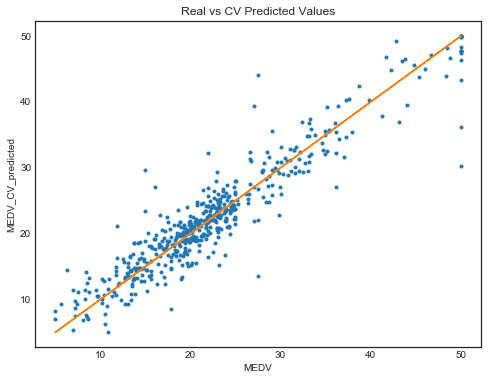

In [39]:
plt.figure( figsize=(8,6))

plt.title('Real vs CV Predicted Values')
plt.xlabel('MEDV')
plt.ylabel('MEDV_CV_predicted')
_ = plt.plot(y, y_pred_mlp_cv, '.', y, y, '-')

mae: 2.178


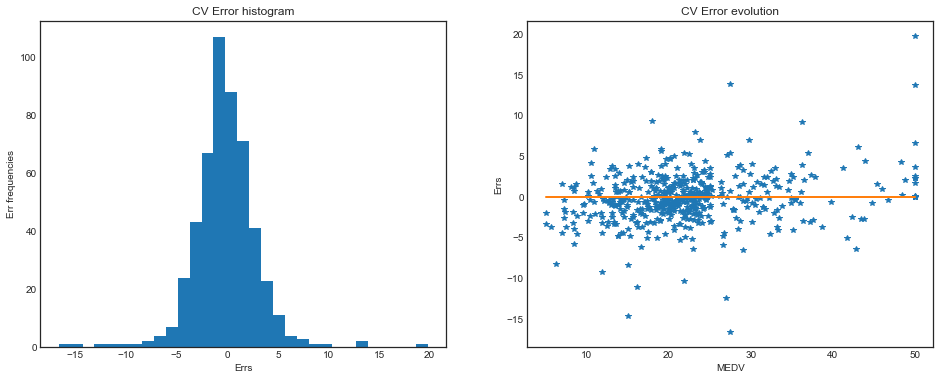

In [40]:
err = y - y_pred_mlp_cv

print("mae: %.3f" % (abs(err).mean()) )

plt.figure( figsize=(16,6))

plt.subplot(1,2,1)
plt.title("CV Error histogram")
plt.xlabel("Errs")
plt.ylabel("Err frequencies")
_ = plt.hist(err, bins=31)

plt.subplot(1,2,2)
plt.title("CV Error evolution")
plt.xlabel("MEDV")
plt.ylabel("Errs")
_ = plt.plot(y, err, '*', y, 0.*y, '-')

plt.show()

## Weight structure

In [41]:
mlp_m_new =  MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, 
                          activation='relu', 
                          solver='adam', alpha=alpha,
                          early_stopping=True,
                          warm_start=False,    
                          tol=1.e4, max_iter=1)

In [42]:
mlp_m_new.fit(x, y)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=10000.0, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [43]:
mlp_m_new.n_iter_

1

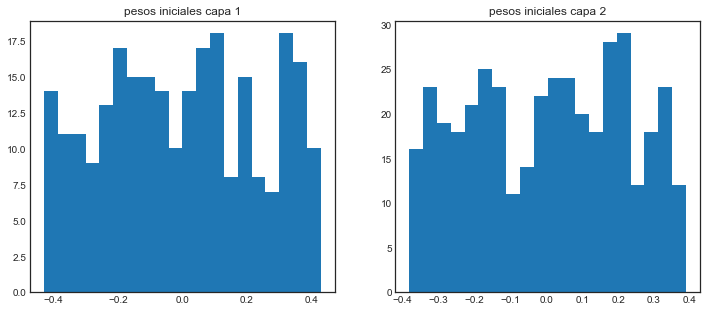

In [44]:
plt.figure( figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("pesos iniciales capa 1")
_ = plt.hist(mlp_m_new.coefs_[0].ravel(), bins=20)

plt.subplot(1, 2, 2)
plt.title("pesos iniciales capa 2")
_ = plt.hist(mlp_m_new.coefs_[1].ravel(), bins=20)

plt.show()

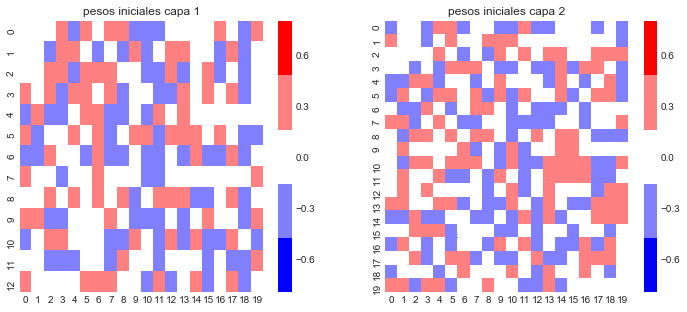

In [45]:
cMap = plt.cm.get_cmap("bwr",lut=5) 
plt.figure( figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("pesos iniciales capa 1")
_ = sns.heatmap(mlp_m_new.coefs_[0], vmin=-0.8, vmax=0.8, cmap=cMap)

plt.subplot(1, 2, 2)
plt.title("pesos iniciales capa 2")
_ = sns.heatmap(mlp_m_new.coefs_[1], vmin=-0.8, vmax=0.8, cmap=cMap)

plt.show()

In [46]:
mlp_m_new =  MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, 
                          activation='relu', 
                          solver='adam', alpha=alpha,
                          early_stopping=True,
                          warm_start=False,    
                          tol=1.e-8, max_iter=10000)

In [47]:
mlp_m_new.fit(x, y)

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=1e-08, validation_fraction=0.1,
       verbose=False, warm_start=False)

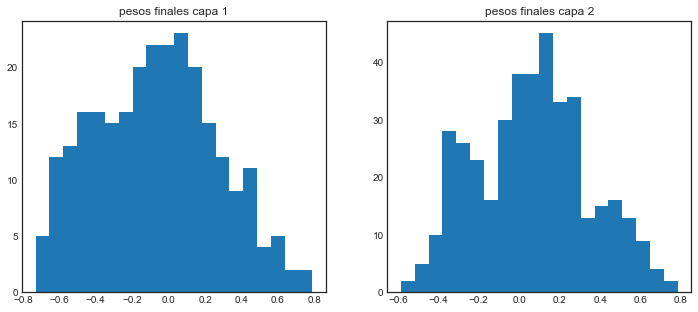

In [48]:
plt.figure( figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("pesos finales capa 1")
_ = plt.hist(mlp_m_new.coefs_[0].ravel(), bins=20)

plt.subplot(1, 2, 2)
plt.title("pesos finales capa 2")
_ = plt.hist(mlp_m_new.coefs_[1].ravel(), bins=20)

plt.show()

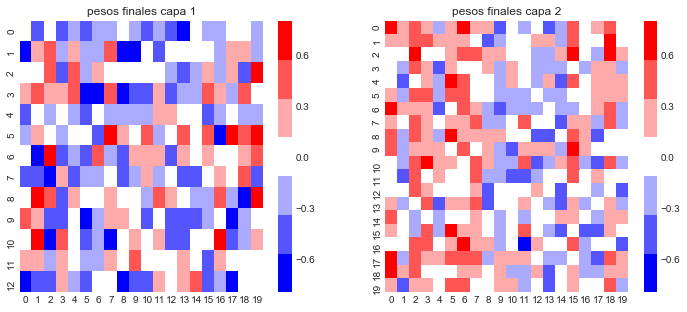

In [49]:
cMap = plt.cm.get_cmap("bwr",lut=7) 

plt.figure( figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("pesos finales capa 1")
_ = sns.heatmap(mlp_m_new.coefs_[0], vmin=-0.8, vmax=0.8, cmap=cMap)

plt.subplot(1, 2, 2)
plt.title("pesos finales capa 2")
_ = sns.heatmap(mlp_m_new.coefs_[1], vmin=-0.8, vmax=0.8, cmap=cMap)

plt.show()